In [1]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import  CatBoostRegressor
from lightgbm import  LGBMRegressor
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
import optuna
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from sklearn.preprocessing import MinMaxScaler


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
pip install --upgrade numpy pandas scipy matplotlib scikit-learn tensorflow keras optuna


  Using cached numpy-2.4.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset_train = pd.read_csv('OANDA_EURUSD, 60 (1).csv')

dataset_train

,time,open,high,low,close,Plot,Plot.1,Plot.2,Shapes,Shapes.1,Shapes.2,Shapes.3,Shapes.4,Shapes.5,Shapes.6,...,EMA RSI.2,RSI.3,MA.3,Upper Band.3,Lower Band.3,EMA RSI.3,RSI.4,MA.4,Upper Band.4,Lower Band.4,EMA RSI.4,Open Interest (Цена откр.),Open Interest (Макс.,Open Interest (Мин.),Open Interest (Закрыть)
0,2025-12-09T13:00:00+03:00,1.16524,1.16543,1.16404,1.16447,1.164591,1.164443,1.164588,0,0,0,0,0,0,0,...,51.937631,52.320222,46.089428,62.087829,30.091027,51.937631,52.320222,46.089428,62.087829,30.091027,51.937631,NaN,NaN,NaN,NaN
1,2025-12-09T14:00:00+03:00,1.16448,1.16478,1.16381,1.16436,1.164525,1.164434,1.164566,0,0,0,0,0,0,0,...,51.076905,48.494729,47.086277,60.930379,33.242175,51.076905,48.494729,47.086277,60.930379,33.242175,51.076905,NaN,NaN,NaN,NaN
2,2025-12-09T15:00:00+03:00,1.16436,1.16444,1.16343,1.16377,1.164309,1.164364,1.164539,0,0,0,0,0,0,0,...,49.287356,43.918706,47.961439,58.215497,37.707381,49.287356,43.918706,47.961439,58.215497,37.707381,49.287356,NaN,NaN,NaN,NaN
3,2025-12-09T16:00:00+03:00,1.16378,1.16400,1.16290,1.16346,1.164067,1.164269,1.164516,0,0,0,0,0,0,0,...,46.953464,39.951789,48.065498,57.943168,38.187827,46.953464,39.951789,48.065498,57.943168,38.187827,46.953464,NaN,NaN,NaN,NaN
4,2025-12-09T17:00:00+03:00,1.16346,1.16388,1.16282,1.16376,1.163979,1.164215,1.164487,0,0,0,0,0,0,0,...,45.316267,40.404676,47.930948,58.143380,37.718516,45.316267,40.404676,47.930948,58.143380,37.718516,45.316267,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2025-12-26T20:00:00+03:00,1.17652,1.17705,1.17616,1.17702,1.177459,1.177846,1.178507,0,0,0,0,0,0,0,...,44.319071,37.475843,46.860548,60.858126,32.862970,44.319071,37.475843,46.860548,60.858126,32.862970,44.319071,NaN,NaN,NaN,NaN
296,2025-12-26T21:00:00+03:00,1.17704,1.17738,1.17690,1.17720,1.177385,1.177778,1.178500,0,0,0,0,0,0,0,...,43.807589,42.273142,46.583044,60.712718,32.453371,43.807589,42.273142,46.583044,60.712718,32.453371,43.807589,NaN,NaN,NaN,NaN
297,2025-12-26T22:00:00+03:00,1.17719,1.17768,1.17692,1.17768,1.177469,1.177768,1.178512,0,0,0,0,0,0,0,...,44.148833,45.172565,46.401309,60.505351,32.297266,44.148833,45.172565,46.401309,60.505351,32.297266,44.148833,NaN,NaN,NaN,NaN
298,2025-12-26T23:00:00+03:00,1.17768,1.17818,1.17724,1.17751,1.177481,1.177741,1.178496,0,0,0,0,0,0,0,...,44.981799,47.480697,46.208223,60.141098,32.275348,44.981799,47.480697,46.208223,60.141098,32.275348,44.981799,NaN,NaN,NaN,NaN


In [4]:
dataset_train.describe(include = 'all')

,time,open,high,low,close,Plot,Plot.1,Plot.2,Shapes,Shapes.1,Shapes.2,Shapes.3,Shapes.4,Shapes.5,Shapes.6,...,EMA RSI.2,RSI.3,MA.3,Upper Band.3,Lower Band.3,EMA RSI.3,RSI.4,MA.4,Upper Band.4,Lower Band.4,EMA RSI.4,Open Interest (Цена откр.),Open Interest (Макс.,Open Interest (Мин.),Open Interest (Закрыть)
count,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.0,0.0,0.0,0.0
unique,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-12-09T13:00:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.173430,1.173970,1.172915,1.173472,1.173366,1.173097,1.172364,0.043333,0.056667,0.006667,0.006667,0.010000,0.006667,0.010000,...,55.044668,54.970849,55.120310,70.399787,39.840833,55.044668,54.970849,55.120310,70.399787,39.840833,55.044668,NaN,NaN,NaN,NaN
std,NaN,0.004394,0.004407,0.004400,0.004374,0.004360,0.004346,0.004380,0.203947,0.231591,0.081513,0.081513,0.099665,0.081513,0.099665,...,12.006382,13.534442,10.764285,12.163214,11.553561,12.006382,13.534442,10.764285,12.163214,11.553561,12.006382,NaN,NaN,NaN,NaN
min,NaN,1.162370,1.162490,1.161510,1.162380,1.162567,1.162989,1.163656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.396786,21.319693,36.638040,47.848789,12.517336,29.396786,21.319693,36.638040,47.848789,12.517336,29.396786,NaN,NaN,NaN,NaN
25%,NaN,1.171885,1.172262,1.171315,1.171875,1.171851,1.171915,1.171013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,44.879968,44.506321,45.931654,60.230796,31.723474,44.879968,44.506321,45.931654,60.230796,31.723474,44.879968,NaN,NaN,NaN,NaN
50%,NaN,1.174015,1.174480,1.173615,1.174040,1.173908,1.173625,1.173400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.612954,54.026330,55.159843,68.745746,37.596065,53.612954,54.026330,55.159843,68.745746,37.596065,53.612954,NaN,NaN,NaN,NaN
75%,NaN,1.176392,1.177042,1.175952,1.176430,1.176369,1.175800,1.174885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.822008,64.583738,61.669518,80.978558,47.806679,63.822008,64.583738,61.669518,80.978558,47.806679,63.822008,NaN,NaN,NaN,NaN


In [6]:
nan_counts = dataset_train.isna().sum()

# Фильтруем те, где пропусков > 100
cols_with_many_nan = nan_counts[nan_counts > 100]

print(cols_with_many_nan)

Open Interest (Цена откр.)    300
Open Interest (Макс.          300
Open Interest (Мин.)          300
Open Interest (Закрыть)       300
dtype: int64


In [7]:
cols_to_drop = dataset_train.columns[dataset_train.isna().sum() > 100]

# 2. Удаляем их из датафрейма
dataset_train.drop(columns=cols_to_drop, inplace=True)


In [13]:
dataset_train['datetime'] = pd.to_datetime(dataset_train['time'])

# Извлекаем простые числа
dataset_train['hour'] = dataset_train['datetime'].dt.hour
dataset_train['day_of_week'] = dataset_train['datetime'].dt.dayofweek

# Циклические признаки для времени (24 часа)
dataset_train['hour_sin'] = np.sin(2 * np.pi * dataset_train['hour'] / 24)
dataset_train['hour_cos'] = np.cos(2 * np.pi * dataset_train['hour'] / 24)

# Саму колонку 'datetime' после этого нужно удалить или сделать индексом
dataset_train = dataset_train.drop('time', axis=1)

In [15]:
nan_counts = dataset_train.isna().sum()

# Фильтруем те, где пропусков > 100
cols_with_many_nan = nan_counts[nan_counts > 1]

print(cols_with_many_nan)

Series([], dtype: int64)


In [17]:
pd.set_option('display.max_rows', None)
dataset_train.dtypes

open                              float64
high                              float64
low                               float64
close                             float64
Plot                              float64
Plot.1                            float64
Plot.2                            float64
Shapes                              int64
Shapes.1                            int64
Shapes.2                            int64
Shapes.3                            int64
Shapes.4                            int64
Shapes.5                            int64
Shapes.6                            int64
Shapes.7                            int64
Plot.3                            float64
Plot.4                            float64
Plot.5                            float64
Ma yüksek                         float64
Ma düşük                          float64
Ema yüksek                        float64
Ema düşük                         float64
Chars                               int64
Chars.1                           

In [19]:
# Importing the training set
training_set = dataset_train.iloc[:, 1:2].values

# Importing the test set
dataset_test = pd.read_csv('OANDA_EURUSD, 60 (1).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(30, 60):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Preprocessing test data
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(30, 330):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
def create_model(trial):
    model = Sequential()

    rnn_type = trial.suggest_categorical('rnn_type', ['LSTM', 'GRU']) # LSTM or GRU.
    
    n_layers = trial.suggest_int('n_layers', 1, 16)
    
    for i in range(n_layers): # necessary to pass sequential data to the next LSTM/GRU layer.
        if i < n_layers - 1:
            return_sequences = True
        else:
            return_sequences = False
        
        units = trial.suggest_int(f'units_{i}', 20, 200)
        dropout = trial.suggest_float(f'dropout_{i}', 0.1, 0.5)

        if rnn_type == 'LSTM':
            model.add(LSTM(units=units, return_sequences=return_sequences, 
                           input_shape=(X_train.shape[1], 1)))
        else:
            model.add(GRU(units=units, return_sequences=return_sequences, 
                          input_shape=(X_train.shape[1], 1)))
        
        model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(units=1))

    # Optimizer selection
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate, clipvalue=1.0)  # Clipping gradients
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate, clipvalue=1.0)

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

def objective(trial):
    model = create_model(trial)
    
    early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True) # Early stopping
    
    model.fit(X_train, y_train, epochs=50, 
              batch_size=trial.suggest_int('batch_size', 16, 64), 
              verbose=0, callbacks=[early_stopping])
    
    loss = model.evaluate(X_train, y_train, verbose=0)
    return loss

# Optuna study to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

[I 2026-01-10 15:04:27,832] A new study created in memory with name: no-name-8a378f21-d4db-4c97-93df-af35a43d70d3
C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\admin\AppData\Local\Temp\ipykernel_23600\2719608606.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2026-01-10 15:04:53,933] Trial 0 finished with value: 0.20297008752822876 and parameters: {'rnn_type': 'GRU', 'n_layers': 14, 'units_0': 107, 'dropout_0': 0.21323961952682172, 'units_1': 157, 'dropout_1': 0.48891854066382623, 'units_2': 83, 'dropout

[I 2026-01-10 15:05:50,102] Trial 4 finished with value: 0.21267078816890717 and parameters: {'rnn_type': 'LSTM', 'n_layers': 6, 'units_0': 116, 'dropout_0': 0.2856656271168784, 'units_1': 137, 'dropout_1': 0.1739161195024285, 'units_2': 135, 'dropout_2': 0.18508000078666942, 'units_3': 141, 'dropout_3': 0.4895953123864034, 'units_4': 37, 'dropout_4': 0.32102266957135794, 'units_5': 181, 'dropout_5': 0.1754360516297299, 'optimizer': 'sgd', 'learning_rate': 0.0002705895474201538, 'batch_size': 62}. Best is trial 1 with value: 0.028077950701117516.
[I 2026-01-10 15:06:01,093] Trial 5 finished with value: 0.2491326481103897 and parameters: {'rnn_type': 'GRU', 'n_layers': 10, 'units_0': 62, 'dropout_0': 0.3858105204421455, 'units_1': 65, 'dropout_1': 0.16068632983040715, 'units_2': 128, 'dropout_2': 0.44281148867230946, 'units_3': 160, 'dropout_3': 0.12631725025444318, 'units_4': 166, 'dropout_4': 0.17365112437346264, 'units_5': 177, 'dropout_5': 0.4512497165866659, 'units_6': 112, 'dropou

[I 2026-01-10 15:07:29,791] Trial 13 finished with value: 0.02446822077035904 and parameters: {'rnn_type': 'LSTM', 'n_layers': 1, 'units_0': 166, 'dropout_0': 0.44885186865593574, 'optimizer': 'adam', 'learning_rate': 0.0039326258336710145, 'batch_size': 30}. Best is trial 10 with value: 0.007384472526609898.
[I 2026-01-10 15:07:39,895] Trial 14 finished with value: 0.05231725424528122 and parameters: {'rnn_type': 'GRU', 'n_layers': 6, 'units_0': 147, 'dropout_0': 0.10062701512118555, 'units_1': 72, 'dropout_1': 0.3115206300880893, 'units_2': 70, 'dropout_2': 0.48458262688534887, 'units_3': 91, 'dropout_3': 0.343184005239764, 'units_4': 169, 'dropout_4': 0.27888309681194096, 'units_5': 43, 'dropout_5': 0.10699231858343167, 'optimizer': 'adam', 'learning_rate': 0.0006170539562042533, 'batch_size': 47}. Best is trial 10 with value: 0.007384472526609898.
[I 2026-01-10 15:07:47,582] Trial 15 finished with value: 0.006779747549444437 and parameters: {'rnn_type': 'LSTM', 'n_layers': 4, 'unit

Best trial: 0.006530329119414091
Best hyperparameters: {'rnn_type': 'LSTM', 'n_layers': 3, 'units_0': 80, 'dropout_0': 0.22673654694287987, 'units_1': 199, 'dropout_1': 0.4057354945421606, 'units_2': 178, 'dropout_2': 0.3675648352551153, 'optimizer': 'rmsprop', 'learning_rate': 7.906275514374769e-05, 'batch_size': 57}


In [22]:
def create_final_model(best_params):
    model = Sequential()

    n_layers = best_params['n_layers']
    rnn_type = best_params['rnn_type'] 

    for i in range(n_layers):
        return_sequences = True if i < n_layers - 1 else False

        units = best_params[f'units_{i}']
        dropout = best_params[f'dropout_{i}']

        if rnn_type == 'LSTM':
            model.add(LSTM(units=units, return_sequences=return_sequences, 
                           input_shape=(X_train.shape[1], 1)))
        else:  # 'GRU'
            model.add(GRU(units=units, return_sequences=return_sequences, 
                          input_shape=(X_train.shape[1], 1)))

        model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(units=1))

    optimizers = {
        'adam': Adam(learning_rate=best_params['learning_rate']),
        'sgd': SGD(learning_rate=best_params['learning_rate']),
        'rmsprop': RMSprop(learning_rate=best_params['learning_rate']),
        'adagrad': Adagrad(learning_rate=best_params['learning_rate'])
    }
    optimizer = optimizers[best_params['optimizer']]

    # Compile model
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model


In [25]:
best_params = study.best_trial.params

best_params

{'rnn_type': 'LSTM',
 'n_layers': 3,
 'units_0': 80,
 'dropout_0': 0.22673654694287987,
 'units_1': 199,
 'dropout_1': 0.4057354945421606,
 'units_2': 178,
 'dropout_2': 0.3675648352551153,
 'optimizer': 'rmsprop',
 'learning_rate': 7.906275514374769e-05,
 'batch_size': 57}

In [27]:
# Building and training the final model with the best hyperparameters

final_model = create_final_model(best_params)
final_model.fit(X_train, y_train, validation_data=(X_test, real_stock_price), epochs=10, batch_size=best_params['batch_size'])


Epoch 1/10


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2593 - val_loss: 1.3094
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.2345 - val_loss: 1.2480
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.2219 - val_loss: 1.1940
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - loss: 0.2062 - val_loss: 1.1433
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 0.1967 - val_loss: 1.0939
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 0.1867 - val_loss: 1.0445
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.1731 - val_loss: 0.9944
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.1640 - val_loss: 0.9438
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.1484 - val_loss: 0.8926
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.1413 - val_loss: 0.8404


In [29]:
predicted_stock_price = final_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


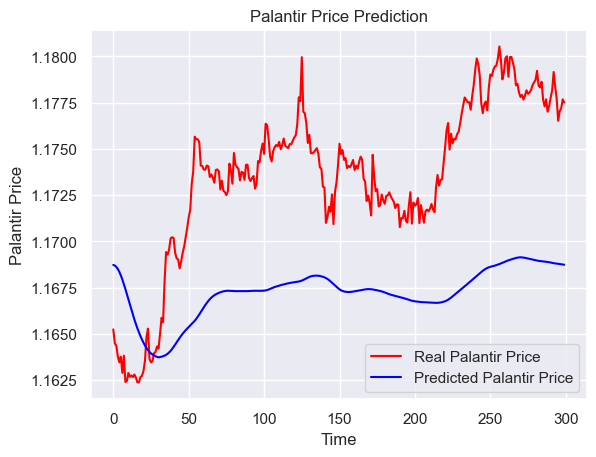

In [31]:
# Visualizing the results

plt.plot(real_stock_price, color='red', label='Real Palantir Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Palantir Price')
plt.title('Palantir Price Prediction')
plt.xlabel('Time')
plt.ylabel('Palantir Price')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")


Mean Squared Error (MSE): 5.121007184960859e-05
Root Mean Squared Error (RMSE): 0.0071561212852779815
Mean Absolute Error (MAE): 0.006716979102198284
R-squared (R2 Score): -1.661832791143909


In [35]:
def predict_future_stock_prices(model, last_known_data, num_future_steps):
    predictions = []
    current_input = last_known_data.copy()
    for _ in range(num_future_steps):
        pred = model.predict(current_input[np.newaxis, :, :])
        predictions.append(pred[0, 0])
        current_input = np.append(current_input[1:], pred, axis=0)
    return np.array(predictions)

# Last known data (from the end of your dataset)
last_known_data = inputs[-10:]

# Number of future steps to predict
num_future_steps = 365  # for example, predict the next 30 days

future_predictions = predict_future_stock_prices(final_model, last_known_data, num_future_steps)
future_predictions = sc.inverse_transform(future_predictions.reshape(-1, 1))

# Create future dates (start date excluded from the period count)
future_dates = pd.date_range(start=dataset_test['time'].iloc[-1], periods=num_future_steps, inclusive='left')

# Create DataFrame for future dates and predictions
future_df = pd.DataFrame(data={'time': future_dates, 'Predicted Stock Price': future_predictions.flatten()})
future_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━

,time,Predicted Stock Price
0,2025-12-27 00:00:00+03:00,1.165293
1,2025-12-28 00:00:00+03:00,1.165263
2,2025-12-29 00:00:00+03:00,1.165188
3,2025-12-30 00:00:00+03:00,1.165053
4,2025-12-31 00:00:00+03:00,1.164894
5,2026-01-01 00:00:00+03:00,1.164713
6,2026-01-02 00:00:00+03:00,1.164527
7,2026-01-03 00:00:00+03:00,1.164308
8,2026-01-04 00:00:00+03:00,1.164068
9,2026-01-05 00:00:00+03:00,1.163807


In [36]:
dataset_test

,time,open,high,low,close,Plot,Plot.1,Plot.2,Shapes,Shapes.1,Shapes.2,Shapes.3,Shapes.4,Shapes.5,Shapes.6,...,EMA RSI.2,RSI.3,MA.3,Upper Band.3,Lower Band.3,EMA RSI.3,RSI.4,MA.4,Upper Band.4,Lower Band.4,EMA RSI.4,Open Interest (Цена откр.),Open Interest (Макс.,Open Interest (Мин.),Open Interest (Закрыть)
0,2025-12-09T13:00:00+03:00,1.16524,1.16543,1.16404,1.16447,1.164591,1.164443,1.164588,0,0,0,0,0,0,0,...,51.937631,52.320222,46.089428,62.087829,30.091027,51.937631,52.320222,46.089428,62.087829,30.091027,51.937631,NaN,NaN,NaN,NaN
1,2025-12-09T14:00:00+03:00,1.16448,1.16478,1.16381,1.16436,1.164525,1.164434,1.164566,0,0,0,0,0,0,0,...,51.076905,48.494729,47.086277,60.930379,33.242175,51.076905,48.494729,47.086277,60.930379,33.242175,51.076905,NaN,NaN,NaN,NaN
2,2025-12-09T15:00:00+03:00,1.16436,1.16444,1.16343,1.16377,1.164309,1.164364,1.164539,0,0,0,0,0,0,0,...,49.287356,43.918706,47.961439,58.215497,37.707381,49.287356,43.918706,47.961439,58.215497,37.707381,49.287356,NaN,NaN,NaN,NaN
3,2025-12-09T16:00:00+03:00,1.16378,1.16400,1.16290,1.16346,1.164067,1.164269,1.164516,0,0,0,0,0,0,0,...,46.953464,39.951789,48.065498,57.943168,38.187827,46.953464,39.951789,48.065498,57.943168,38.187827,46.953464,NaN,NaN,NaN,NaN
4,2025-12-09T17:00:00+03:00,1.16346,1.16388,1.16282,1.16376,1.163979,1.164215,1.164487,0,0,0,0,0,0,0,...,45.316267,40.404676,47.930948,58.143380,37.718516,45.316267,40.404676,47.930948,58.143380,37.718516,45.316267,NaN,NaN,NaN,NaN
5,2025-12-09T18:00:00+03:00,1.16376,1.16379,1.16151,1.16287,1.163662,1.164074,1.164441,0,0,0,0,0,0,0,...,42.504213,34.068052,47.419357,59.211129,35.627584,42.504213,34.068052,47.419357,59.211129,35.627584,42.504213,NaN,NaN,NaN,NaN
6,2025-12-09T19:00:00+03:00,1.16289,1.16412,1.16288,1.16382,1.163707,1.164047,1.164417,0,0,0,0,0,0,0,...,43.089983,44.847294,47.448091,59.211819,35.684362,43.089983,44.847294,47.448091,59.211819,35.684362,43.089983,NaN,NaN,NaN,NaN
7,2025-12-09T20:00:00+03:00,1.16382,1.16397,1.16220,1.16242,1.163339,1.163876,1.164369,0,0,0,0,0,0,0,...,42.082509,39.060085,47.278908,59.417023,35.140794,42.082509,39.060085,47.278908,59.417023,35.140794,42.082509,NaN,NaN,NaN,NaN
8,2025-12-09T21:00:00+03:00,1.16240,1.16249,1.16169,1.16243,1.163080,1.163724,1.164349,1,0,0,0,0,0,0,...,40.254345,34.769853,46.916780,60.052890,33.780670,40.254345,34.769853,46.916780,60.052890,33.780670,40.254345,NaN,NaN,NaN,NaN
9,2025-12-09T22:00:00+03:00,1.16244,1.16300,1.16220,1.16287,1.163020,1.163634,1.164318,0,0,0,0,0,0,0,...,40.191471,40.002851,46.650755,60.116526,33.184984,40.191471,40.002851,46.650755,60.116526,33.184984,40.191471,NaN,NaN,NaN,NaN
